In [4]:
!ls ../data/full_lim_journal_singlerank_05_05_2020/

all_keywords.jsonl
all_keywords_norm_threshold_0_0.015_10000.jsonl
all_keywords_threshold_0_0.015_10000.jsonl
all_keywords_threshold_10_0_10000.jsonl
doc_feature_matrix.mtx
dynamic_time_warp_distances.csv
kwds.jsonl
nasa_affiliation.csv
slope_complex.csv
year_counts.csv


In [25]:
!ls ../models/full_lim_journal_singlerank_05_05_2020/

dtw_manifold_proj.jbl      gensim_tok_dct.mm
gensim_corpus.mm           gensim_tokens.jsonl
gensim_corpus.mm.index     kmeans.jbl
gensim_dct.mm              mat_doc_mapping.csv
gensim_tok_corpus.mm       mlb.jbl
gensim_tok_corpus.mm.index topic_models


In [26]:
!ls ../reports/viz/full_lim_journal_singlerank_05_05_2020/

coherence.png                      gensim_topic_model_viz1000.html
coherence2020-05-06_17:52:24.csv   manifold.png
coherence2020-05-06_20:19:08.csv   topic_distribs_to_bibcodes1000.csv
coherence2020-05-06_20:32:04.csv


In [171]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
in_data_dir = Path('../data/full_lim_journal_singlerank_05_05_2020/')
in_model_dir = Path('../models/full_lim_journal_singlerank_05_05_2020/')
in_report_dir = Path('../reports/viz/full_lim_journal_singlerank_05_05_2020/')

In [42]:
in_docs = in_data_dir / "kwds.jsonl"
in_kwds = in_data_dir / "all_keywords_threshold_0_0.015_10000.jsonl"
in_map = in_model_dir / "mat_doc_mapping.csv"
in_bib = in_report_dir / "topic_distribs_to_bibcodes1000.csv"

In [43]:
df = pd.read_json(in_docs, orient='records', lines=True)
kwds_df = pd.read_json(in_kwds, orient='records', lines=True)
map_df = pd.read_csv(in_map, index_col=0)
bib_df = pd.read_csv(in_bib, index_col=0)

topic_distrib --> bibcode --> doc_id --> years --> aggregate sum

keywords does not necessarily align with documents within a topic

In [136]:
jdf = bib_df.set_index('bibcode').join(df.set_index('bibcode')['year'])
year = jdf.pop('year')
topics = jdf.values.argmax(axis=1)
 # Could potentially add a limit here. Only take when topic prob is over 0.7 or something.

In [229]:
jdf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
bibcode,,,,,,,,,,,,,,,,,,,,,
1991Sci...254...89Y,0.000023,0.185992,0.000017,0.000021,0.000017,0.000028,0.000022,0.000038,0.000033,0.000031,...,0.000034,0.000017,0.000022,0.000017,0.000017,0.000027,0.000024,0.000017,0.000026,0.000027
2000Sci...289.1737S,0.000015,0.444728,0.000011,0.000013,0.000011,0.000018,0.000014,0.000024,0.000021,0.000020,...,0.000022,0.000011,0.000014,0.000011,0.000011,0.000017,0.000015,0.000011,0.000017,0.000017
1986Sci...233..198G,0.000016,0.000020,0.000012,0.265344,0.000012,0.000020,0.000015,0.000027,0.000023,0.000022,...,0.000024,0.000012,0.000015,0.000012,0.000012,0.000019,0.000017,0.000012,0.000018,0.000019
2006Sci...314..806A,0.000015,0.000018,0.000011,0.139079,0.000011,0.000018,0.000014,0.000024,0.000021,0.000020,...,0.012473,0.000011,0.000014,0.000011,0.000011,0.000017,0.000015,0.000011,0.000017,0.000017
2006Sci...312.1369R,0.000013,0.000016,0.000010,0.176147,0.000010,0.000016,0.000012,0.000021,0.000019,0.000018,...,0.013322,0.000010,0.000012,0.000010,0.000010,0.000015,0.000013,0.000010,0.000015,0.000015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995Natur.373...44M,0.000009,0.000011,0.000006,0.000008,0.000006,0.000011,0.000008,0.000014,0.000012,0.000012,...,0.000013,0.000006,0.000008,0.000006,0.000006,0.000010,0.000009,0.000006,0.000010,0.151973
1987Natur.327...38T,0.000008,0.000010,0.000006,0.000007,0.000006,0.000010,0.000008,0.000013,0.000012,0.000011,...,0.000012,0.000006,0.000008,0.000006,0.000006,0.000010,0.000008,0.000006,0.000009,0.157328
1988Natur.334..412J,0.000008,0.000010,0.000006,0.000007,0.000006,0.000010,0.000008,0.000013,0.000012,0.000011,...,0.000012,0.000006,0.000008,0.000006,0.000006,0.000009,0.000008,0.000006,0.000009,0.170573


In [138]:
ty_df = pd.DataFrame({'year': year, 'topic': topics})
ty_df['n'] = 1
cdf = ty_df.groupby(['topic', 'year']).sum().unstack()
cdf

n                                                ...                 \
year  1986  1987 1988 1989 1990 1991 1992 1993 1994 1995  ... 2001 2002 2003   
topic                                                     ...                  
0      NaN   2.0  NaN  1.0  NaN  NaN  1.0  2.0  NaN  NaN  ...  1.0  NaN  NaN   
1      NaN   NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
3      1.0   NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
5      NaN   NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  ...  1.0  NaN  NaN   
6      1.0   1.0  1.0  NaN  NaN  1.0  1.0  1.0  2.0  3.0  ...  1.0  NaN  1.0   
...    ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
992    NaN   1.0  NaN  NaN  2.0  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
995    NaN   NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1.0  NaN  NaN   
996    1.0   1.0  1.0  NaN  1.0  NaN  1.0  NaN  NaN  1.0  ...  1.0  NaN  NaN   
998    NaN   1.0  2.0  NaN  NaN  NaN  3.0  NaN  1.0  1.0  ...  1.0  2.0  1.0   
999    NaN  10.0  4.0  4.0  3.0  2.0  2.0  1.0  NaN  4.0  ...  NaN  NaN  NaN   

                                          
year  2004 2005 2006 2007 2008 2009 2010  
topic                                     
0      NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1      NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3      NaN  NaN  2.0  NaN  NaN  NaN  NaN  
5      NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6      NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...    ...  ...  ...  ...  ...  ...  ...  
992    NaN  1.0  NaN  NaN  NaN  NaN  NaN  
995    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
996    1.0  NaN  NaN  NaN  NaN  NaN  NaN  
998    1.0  3.0  3.0  1.0  1.0  1.0  2.0  
999    2.0  2.0  2.0  1.0  2.0  NaN  NaN  

[795 rows x 25 columns]

In [147]:
desc_order_topics = cdf.sum(axis=1).sort_values(ascending=False)

(0, 50)

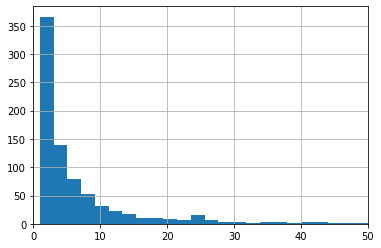

In [222]:
cdf.sum(axis=1).hist(bins=100)
plt.xlim(0, 50)

In [223]:
topic_ts = cdf.reindex(desc_order_topics.index).iloc[30]['n'].reset_index().fillna(0)

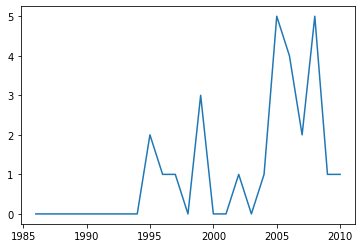

In [227]:
plt.plot(topic_ts['year'], topic_ts.iloc[:, 1])